## AWnet test

In [2]:
from awnet import pwc_5x5_sigmoid_bilinear   # cm:import AWnet model
import torch

AWnet = pwc_5x5_sigmoid_bilinear.pwc_residual().cuda()
AWnet.load_state_dict(torch.load('awnet/fs0_61_294481_0.00919393_dict.pkl'))
AWnet = AWnet.eval()

import warnings
warnings.filterwarnings("ignore")

def fuseTwoImages(I, J_hat):
    with torch.no_grad():
        fusedTensor,warp,mask = AWnet(J_hat,I)
    return fusedTensor, warp, mask

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Similar input, but totally different fusion results.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


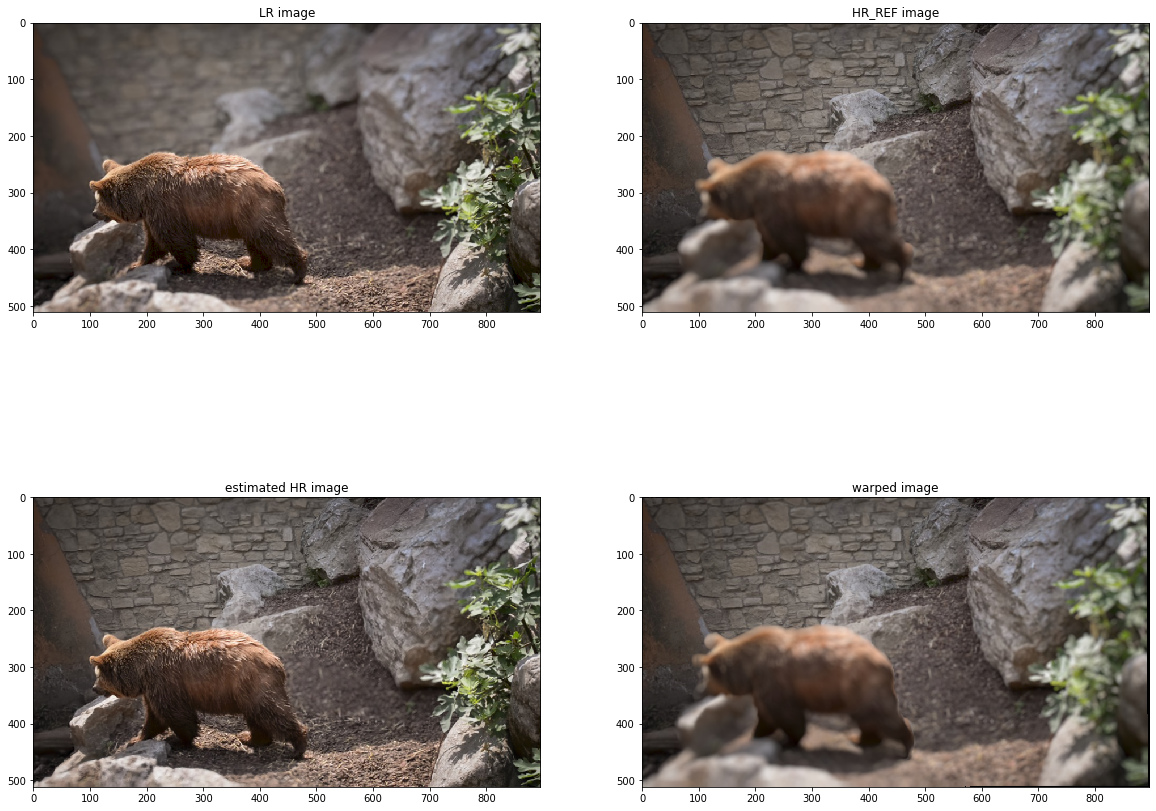

In [4]:
a = cv2.imread("awnet-test-imgs/lr_00005.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
b = cv2.imread("awnet-test-imgs/lr_00017.png")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[0][0].set_title('LR image')
ax[0][1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[0][1].set_title('HR_REF image')
ax[1][0].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
ax[1][0].set_title('estimated HR image')
ax[1][1].imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1][1].set_title('warped image')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


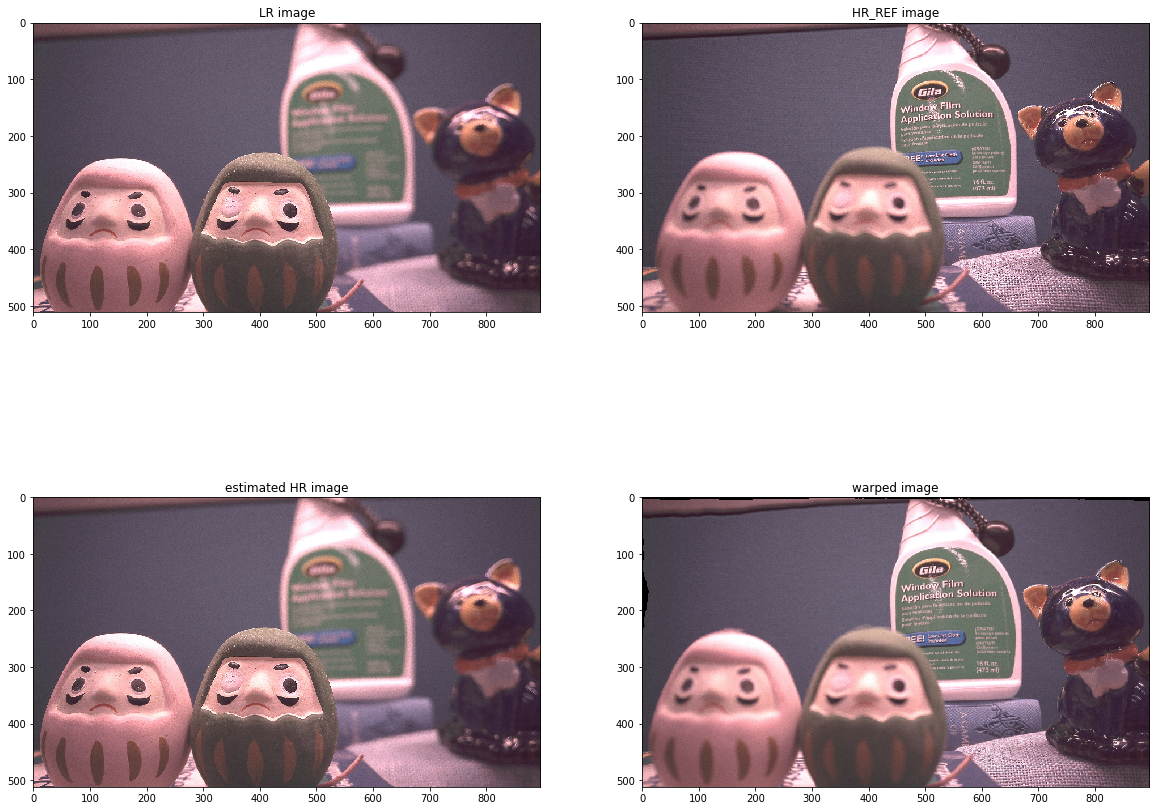

In [4]:
a = cv2.imread("awnet-test-imgs/75_cv2.jpg")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.

b = cv2.imread("awnet-test-imgs/75_cv1.jpg")#[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.
a = cv2.resize(a,(896, 512))
a2 = a
b = cv2.resize(b,(896, 512))
a = torch.Tensor(a[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
b = torch.Tensor(b[np.newaxis, :, :, ::-1].transpose(0, 3, 1, 2)/255.).cuda()
c, warp, mask = fuseTwoImages(a, b)
fig, ax = plt.subplots(2, 2, figsize=(20, 16))
ax[0][0].imshow((a[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[0][0].set_title('LR image')
ax[0][1].imshow((b[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[0][1].set_title('HR_REF image')
ax[1][0].imshow(c[0].cpu().detach().numpy().transpose(1, 2, 0))
ax[1][0].set_title('estimated HR image')
ax[1][1].imshow((warp[0]).cpu().detach().numpy().transpose(1, 2, 0))
ax[1][1].set_title('warped image')
plt.show()

In [7]:
## speed test:
## 01/13/2020

import time
start_time = time.time()
for i in range(1):
    a = np.random.rand(100, 128, 64, 3)
    b = np.random.rand(100, 128, 64, 3)
    a = torch.Tensor(a.transpose(0, 3, 1, 2)).cuda()
    b = torch.Tensor(b.transpose(0, 3, 1, 2)).cuda()
    c, warp, mask = fuseTwoImages(a, b)
(time.time() - start_time)/100

0.003577287197113037